# Brainster Academy Final Project
### Team 3: Tatjana Veljkovic, Ilija Todorov, Ivana Tomovska Efremov

### Part Three

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import string
import nltk
nltk.download('punkt')
import re
from string import punctuation
from nltk.tokenize import WordPunctTokenizer, PunktSentenceTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import tqdm
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

from statistics import mean

from scipy import spatial
from ast import literal_eval

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
#!pip install pillow

In [4]:
#!pip install wordcloud

### Read data - 2011-2015

In [5]:
List_of_all_files = ['PartTwo_2011','PartTwo_2012','PartTwo_2013','PartTwo_2014','PartTwo_2015']

In [6]:
Working_file = List_of_all_files[2] #Chose file for working
print(Working_file)

PartTwo_2013


### Read year 2013

In [7]:
tweets_clustered = pd.read_csv(Working_file + '.csv')

In [8]:
tweets_clustered.head(2)

source  year                   Tweets_cleaned  Cluster_labels  month  \
0  bbchealth  2013                pair charge fraud               3     12   
1  bbchealth  2013  surgery cancel due aampe demand               3     12   

   day_of_week                                            vectors  
0            1  [0.6753372550010681, -0.3447597026824951, 2.58...  
1            1  [2.0040230751037598, -1.9549212455749512, 6.46...

In [9]:
tweets_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18906 entries, 0 to 18905
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   source          18906 non-null  object
 1   year            18906 non-null  int64 
 2   Tweets_cleaned  18899 non-null  object
 3   Cluster_labels  18906 non-null  int64 
 4   month           18906 non-null  int64 
 5   day_of_week     18906 non-null  int64 
 6   vectors         18906 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.0+ MB


In [10]:
tweets_clustered['year'].value_counts().sort_index()

2013    18906
Name: year, dtype: int64

### Deleting NaN rows

In [11]:
tweets_clustered.shape

(18906, 7)

In [12]:
tweets_clustered['Tweets_cleaned'].isna().sum()

7

In [13]:
tweets_clustered.loc[tweets_clustered['Tweets_cleaned'].isna()]

source  year Tweets_cleaned  Cluster_labels  month  \
7771         goodhealth  2013            NaN               3      5   
9338   KaiserHealthNews  2013            NaN               3     11   
9367   KaiserHealthNews  2013            NaN               3     11   
9910   KaiserHealthNews  2013            NaN               3      7   
14707         nprhealth  2013            NaN               3     11   
15023         nprhealth  2013            NaN               3     10   
15032         nprhealth  2013            NaN               3     10   

       day_of_week                                            vectors  
7771             3  [-0.03176940232515335, -0.013855990022420883, ...  
9338             2  [-0.01538485661149025, 0.012709315866231918, -...  
9367             1  [0.02998298779129982, -0.0006956974393688142, ...  
9910             1  [-0.010734089650213718, -0.028044693171977997,...  
14707            4  [-0.03234541416168213, 0.009123111143708229, 0...  
15023            1  [-0.007899705320596695, -0.025428231805562973,...  
15032            0  [0.009530274197459221, 0.016373181715607643, -...

In [14]:
tweets_clustered.dropna(subset=['Tweets_cleaned'], inplace=True)

In [15]:
tweets_clustered.shape

(18899, 7)

In [16]:
clusters = tweets_clustered['Cluster_labels'].value_counts()

# General info

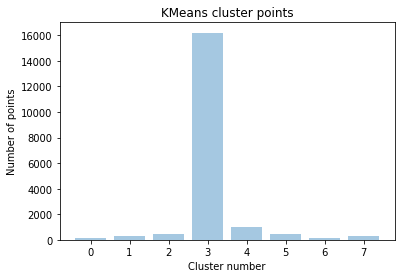

In [17]:
plt.bar([x for x in range(len(clusters))], tweets_clustered.groupby(['Cluster_labels'])['source'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [18]:
twitter_weekdays = tweets_clustered['day_of_week'].value_counts()
df_weekdays = pd.DataFrame(data=twitter_weekdays)
df_weekdays['Weekday'] = df_weekdays.index
df_weekdays.sort_values('Weekday')

day_of_week  Weekday
0         3263        0
1         3425        1
2         3398        2
3         3583        3
4         2915        4
5         1429        5
6          886        6

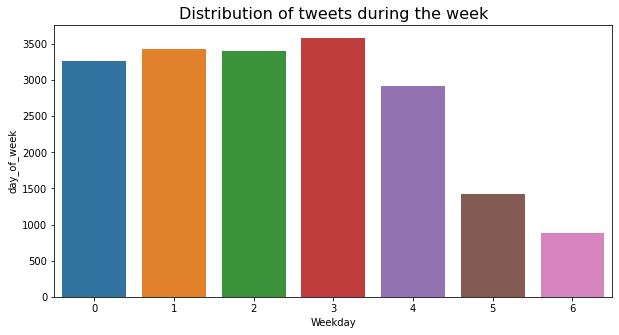

In [19]:
plt.figure(figsize = (10,5))
sns.barplot(y ='day_of_week', x = 'Weekday', data = df_weekdays)
plt.title('Distribution of tweets during the week', fontsize=16)
plt.show()

### Note: Most of the tweets are released during workdays (3 to 4 times more on workdays than during weekend days)

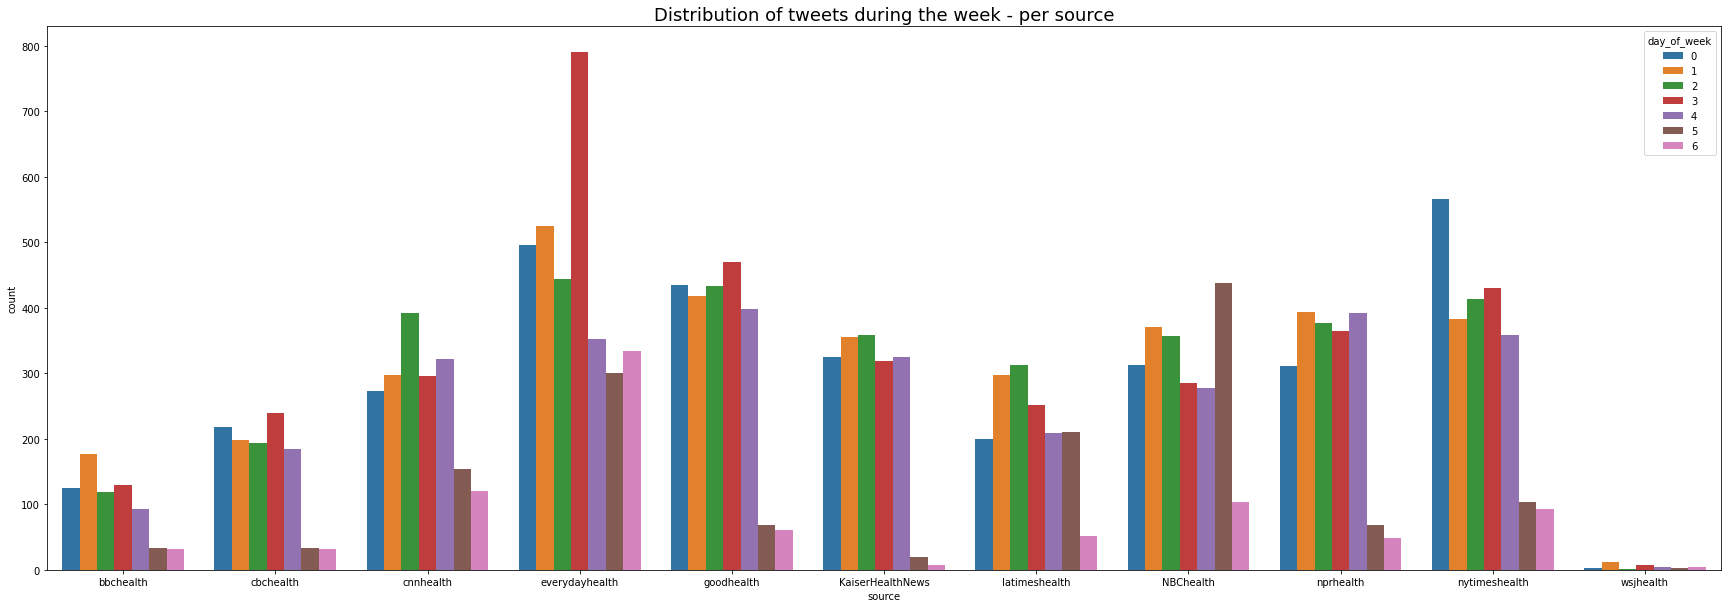

In [20]:
plt.figure(figsize = (30,10))
sns.countplot(x ='source', hue = "day_of_week", data = tweets_clustered)
plt.title('Distribution of tweets during the week - per source', fontsize=18)
plt.show()

### Note: Uneven distribution od tweets among sources, same pattern of tweets during days of the week

In [21]:
tweets_breakdown = tweets_clustered.groupby(['source', 'month']).count()
#tweets_breakdown[:50]

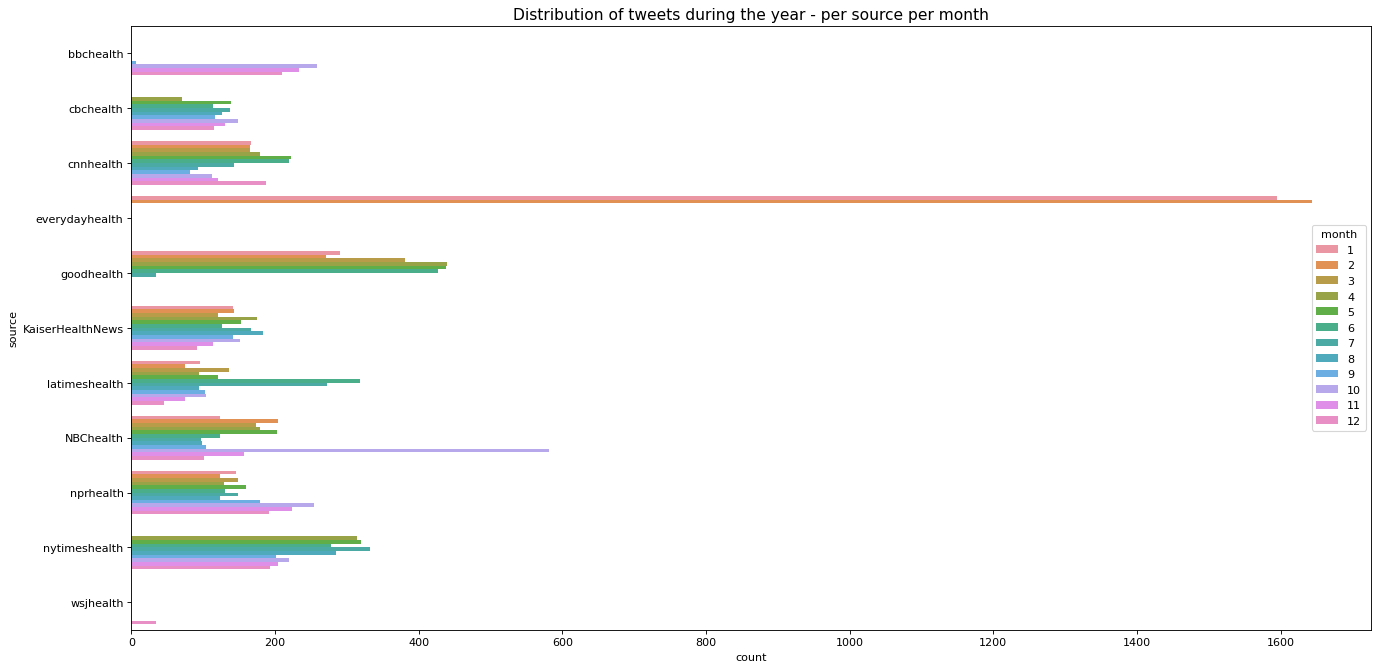

In [22]:
plt.figure(figsize=(20,10),dpi=80)
sns.countplot(data=tweets_clustered, y="source", hue="month")
plt.title('Distribution of tweets during the year - per source per month', fontsize=14)
plt.show()

# Word cloud per source

In [23]:
source = tweets_clustered['source'].unique().tolist()
#source

In [24]:
source_list_toshow = []

source_list = tweets_clustered['source'].unique().tolist()

for i in source_list:
    source_individual = tweets_clustered[tweets_clustered['source'] == i]
    text_source_individual = " ".join(cat for cat in source_individual.Tweets_cleaned)
    #mask = np.array(Image.open("twitter-2012-negative-logo-5C6C1F1521-seeklogo.com.png"))
    
    
    word_cloud_source = WordCloud(
    width=5000,
    height=3000,
    random_state=1,
    #mask=mask,
    background_color="white",
    colormap="winter",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(text_source_individual)
    
    source_list_toshow.append(word_cloud_source)

In [25]:
#source 

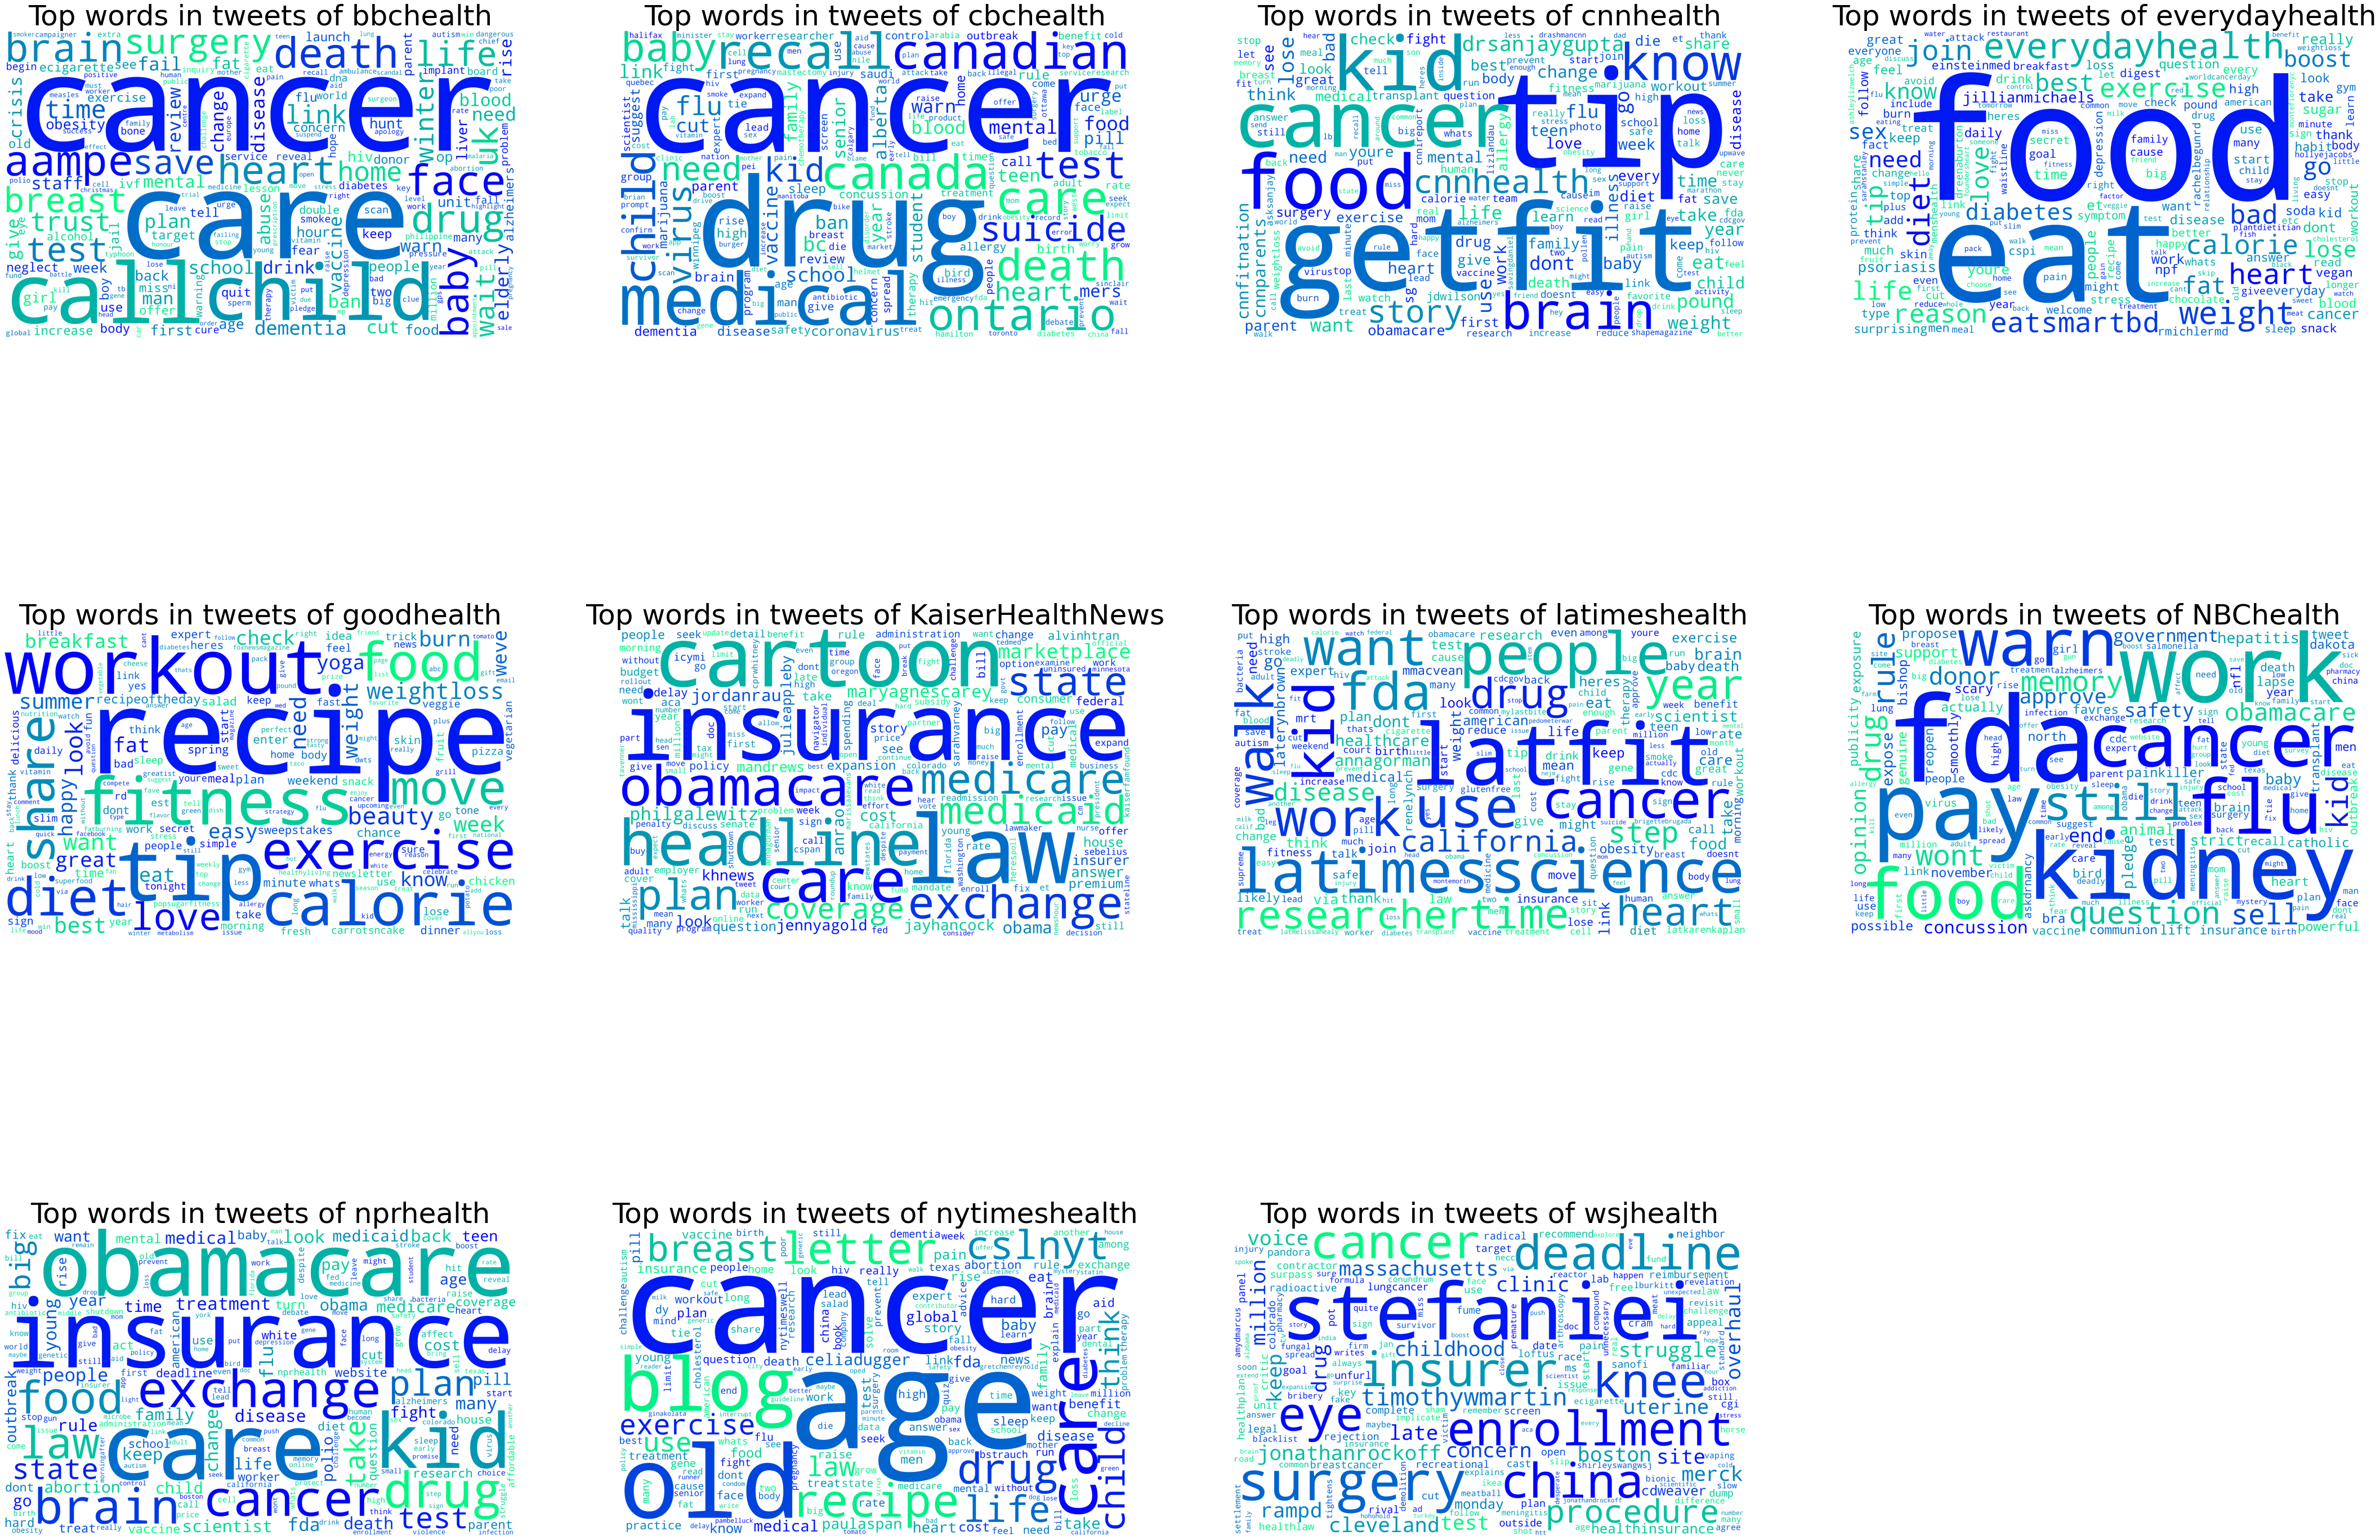

In [26]:
fig = plt.figure(figsize=(75,75))
count = 1

for i in range(len(source)):
    ax=fig.add_subplot(4,4, count)
    ax.imshow(source_list_toshow[i])
    plt.title((f'Top words in tweets of {source[i]}'), size=50)
    ax.axis("off")
    count += 1
plt.show()